In [1]:
import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Spreads statistics

In [2]:
market_orders = pd.read_feather('market_orders_USDRUB.feather')
market_orders[:5]

,Time,AGGRESSOR_SIDE,PRICE_min,PRICE_max,SIZE_sum,Date,TimeOnly,DOW,H,Impact,BID,ASK,MID,Spread
0,2021-02-01 10:00:00.271880,B,75.5975,75.6700,663,2021-02-01,10:00:00.271880,1,10,0.0725,75.565002,75.599998,75.582504,0.0350
1,2021-02-01 10:00:00.304507,B,75.6625,75.6625,10,2021-02-01,10:00:00.304507,1,10,0.0000,75.567497,75.662498,75.614998,0.0950
2,2021-02-01 10:00:00.346729,B,75.6575,75.6575,3,2021-02-01,10:00:00.346729,1,10,0.0000,75.602501,75.657501,75.630005,0.0550
3,2021-02-01 10:00:00.360369,S,75.6025,75.6025,20,2021-02-01,10:00:00.360369,1,10,0.0000,75.602501,75.625000,75.613754,0.0225
4,2021-02-01 10:00:00.377261,S,75.6025,75.6025,4,2021-02-01,10:00:00.377261,1,10,0.0000,75.602501,75.639999,75.621246,0.0375


In [3]:
market_orders[market_orders['Spread'] == 0.]

,Time,AGGRESSOR_SIDE,PRICE_min,PRICE_max,SIZE_sum,Date,TimeOnly,DOW,H,Impact,BID,ASK,MID,Spread
689269,2021-02-25 17:09:19.253217,S,74.0,74.0,53,2021-02-25,17:09:19.253217,4,17,0.0,74.000000,74.000000,74.000000,0.0
886002,2021-03-04 14:51:47.420474,B,73.7,73.7,50,2021-03-04,14:51:47.420474,4,14,0.0,73.699997,73.699997,73.699997,0.0


In [4]:
# Filter orders by time and day of week
df = market_orders[(market_orders['DOW']<=5) & 
                   (market_orders['H']>=10) & 
                   (market_orders['H']<=17) &
                   (market_orders['TimeOnly'] > datetime.time(10, 10, 0)) &
                   (market_orders['TimeOnly'] < datetime.time(17, 40, 0)) &
                   (market_orders['Spread'] != 0)]
df['Spread'] = np.round(df['Spread'] / 0.0025, decimals=0)

C:\Users\Sharp.Ra\AppData\Local\Temp/ipykernel_16636/163228665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Spread'] = np.round(df['Spread'] / 0.0025, decimals=0)


<AxesSubplot:xlabel='Spread', ylabel='Count'>

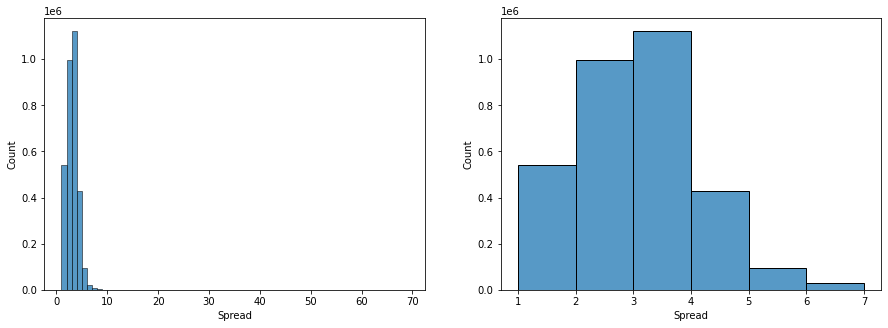

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='Spread', binwidth=1, ax=ax[0])
sns.histplot(data=df[df['Spread']<=7.], x='Spread', binwidth=1, ax=ax[1])

In [23]:
for i in range(0, 8):
    print(f"{i} - {np.sum(df['Spread']==i) / df.shape[0] * 100:0.1f}")

0 - 0.0
1 - 16.8
2 - 31.0
3 - 34.9
4 - 13.4
5 - 2.9
6 - 0.7
7 - 0.2


In [24]:
# Spread range share
print(df[df['Spread']<=4].shape[0]/df.shape[0])  # 4 tick
print(df[df['Spread']<=6].shape[0]/df.shape[0])  # 6 tick

0.9609907563613183
0.9964300429918603


<AxesSubplot:xlabel='Spread', ylabel='Probability'>

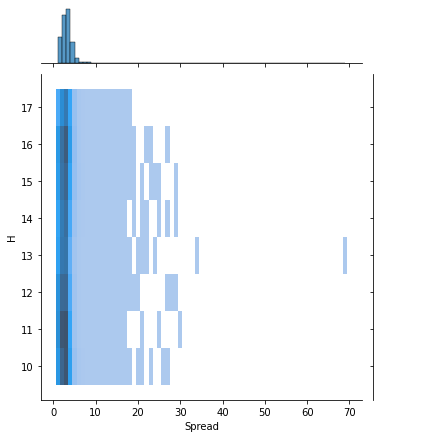

In [8]:
# Histogram Spreads by Hours
g = sns.JointGrid()
sns.histplot(data=df, x='Spread', y='H', stat='probability', binwidth=(1, 1), discrete=(True, True), ax=g.ax_joint)
sns.histplot(data=df, x='Spread', stat='probability', binwidth=1, ax=g.ax_marg_x)

<AxesSubplot:xlabel='Spread', ylabel='Probability'>

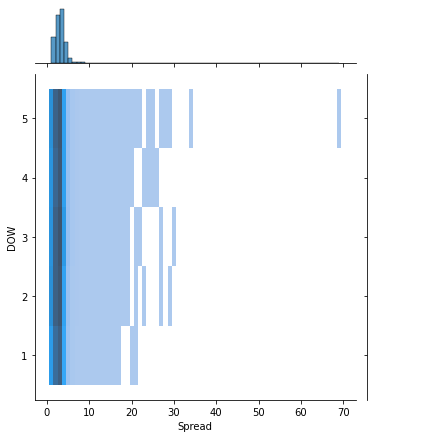

In [9]:
# Histogram Spreads by Day of Week
g = sns.JointGrid()
sns.histplot(data=df, x='Spread', y='DOW', stat='probability', binwidth=(1, 1), discrete=(True, True), ax=g.ax_joint)
sns.histplot(data=df, x='Spread', stat='probability', binwidth=1, ax=g.ax_marg_x)

<AxesSubplot:xlabel='Spread', ylabel='Probability'>

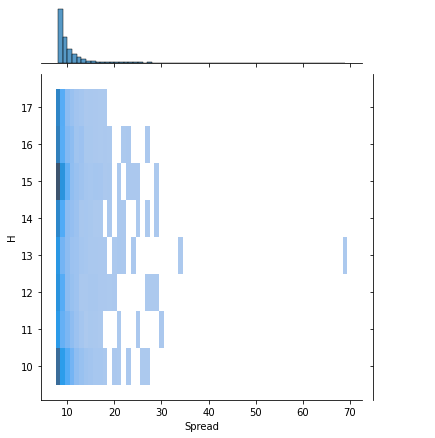

In [25]:
# Histogram Hour, big spreads
g = sns.JointGrid()
sns.histplot(data=df[df.Spread>7], x='Spread', y='H', stat='probability', binwidth=(1, 1), discrete=(True, True), 
             ax=g.ax_joint)
sns.histplot(data=df[df.Spread>7], x='Spread', stat='probability', binwidth=1, ax=g.ax_marg_x)

In [26]:
# PMF for spreads (1-6 ticks)
spread_pmf = np.array([df[df['Spread'] == k]['Spread'].count() for k in range(1, 7)]) \
    / df[df['Spread'] <= 6]['Spread'].count()
spread_pmf

array([0.16907321, 0.31100837, 0.35036459, 0.13398757, 0.02894879,
       0.00661747])

In [28]:
# EXPORT
np.savez('spreads', spread_pmf)

In [29]:
np.load('spreads.npz')['arr_0']

array([0.16907321, 0.31100837, 0.35036459, 0.13398757, 0.02894879,
       0.00661747])